# Пример реализации функций map и reduce на языке python



#### Пример задачи wordcount.
Посчитаем частоты слов в песенке в лесу родилась елочка при помощи map-reduce

In [1]:
text = """
В лесу родилась ёлочка,
В лесу она росла.
Зимой и летом стройная,
Зелёная была.
Метель ей пела песенку:
Спи, ёлочка, бай-бай!
Мороз снежком укутывал:
Смотри, не замерзай!
Трусишка зайка серенький
Под ёлочкой скакал.
Порою волк, сердитый волк,
Рысцою пробегал.
Чу! Снег по лесу частому
Под полозом скрипит.
Лошадка мохноногая
Торопится, бежит.
Везёт лошадка дровеньки,
На дровнях мужичок.
Срубил он нашу ёлочку
Под самый корешок.
Теперь ты здесь, нарядная,
На праздник к нам пришла
И много, много радости
Детишкам принесла.
"""

###### Служебная функция  для разбивки текста на строки и выделения в строках слов

In [2]:
import re
def generate_lines(text):
    word_re = re.compile(r"[а-яё]+")
    lines = text.strip().lower().split("\n")
    result = []
    for line in lines:
        result.append(word_re.findall(line))
    return result

### Эмуляция hadoop

###### !!! Внимание !!!
Эта функция эмулирует запуск mapreduce. Она предназначена только для целей отладки и демонстрации парадигмы MapReduce. На реальных проектах работа этой функции будет заменена целым стеком программного обеспечения - hadoop.

In [3]:
from collections import defaultdict
def run_mapreduce(input, map_fnc, reduce_fnc):
    map_result = defaultdict(lambda: [])
    for obj in input:
        for key, value in map_fnc(obj):
            map_result[key].append(value)
    
    reduce_result = []
    for key in map_result:
        for key, value in reduce_fnc(key, map_result[key]):
            reduce_result.append((key, value))
    return reduce_result

#### Функции map и reduce для реализации word_count:

In [4]:
def map_wordcount(line):
    for word in line:
        yield(word, 1)

In [5]:
def reduce_wordcount(word, counts):
    yield word, sum(counts)

#### Запустим наш эмулятор mapreduce и распечатаем 10 самых популярных слов

In [6]:
lines = generate_lines(text)
result = run_mapreduce(lines, map_wordcount, reduce_wordcount)

for key, value in sorted(result, key=lambda x: -x[1])[:10]:
    print(key, value)

лесу 3
под 3
в 2
ёлочка 2
и 2
бай 2
волк 2
лошадка 2
на 2
много 2


# Домашнее задание

Проанализировать 1-й том произведения Л.Толстого "Война и Мир" при помощи mapreduce.

##### прочитаем текст

In [7]:
with open('war_peace_1.txt', 'rb') as f:
    text = f.read().decode()
print(text[:80])

Война и мир. Книга 1
Лев Николаевич Толстой


Война и мир #1
В книгу вошли 


#### Задание №1
Найти частоты 5 самых популярных слов в тексте

In [8]:
lines = generate_lines(text)
result = run_mapreduce(lines, map_wordcount, reduce_wordcount)
for key, value in sorted(result, key=lambda x: -x[1])[:5]:
    print(key, value)

и 10829
в 5393
не 4556
что 4067
он 3867


#### Задание №2
Найти сколько раз в тексте упоминаются фамилии безухов, ростова, болконский

Подсказка: необходимо модифицировать функцию map_wordcount для того чтобы она учитывала только нужные нам слова.

###### Пример:

In [9]:
leave_only = ['таня', 'мячик']
sample_text = ['наша', 'таня', 'громко', 'плачет', 'уронила','в', 'речку', 'мячик']

for word in sample_text:
    if word in leave_only:
        print(word, 1)
    

таня 1
мячик 1


In [10]:
second_names = ['безухов', 'ростова', 'болконский']

def map_wordcount_filter(line):
    for word in line:
        if word in second_names:
            yield(word, 1)

lines = generate_lines(text)
result_2 = run_mapreduce(lines, map_wordcount_filter, reduce_wordcount)
for key, value in result_2:
    print(key, value)

болконский 70
безухов 14
ростова 120


#### Задание №3 (по желанию)

Это задание стоит выполнять только если у вас уже был опыт программирования на python. 


1) прочитать статью "закон ципфа" на wikipedia
https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%A6%D0%B8%D0%BF%D1%84%D0%B0
    
2) Построить график распределения частот слов в 1-м томе "войны и мир" аналогичный приведенному в статье.
Для визуализации графика воспользоваться библиотекой matplotlib

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
sorted_result = sorted(result, key=lambda x: -x[1])

In [13]:
quantities = list()
quantities = [sorted_result[x][1] for x in range(len(sorted_result))][:300]

In [14]:
quantities_series = pd.Series(quantities, index=range(1, 301))

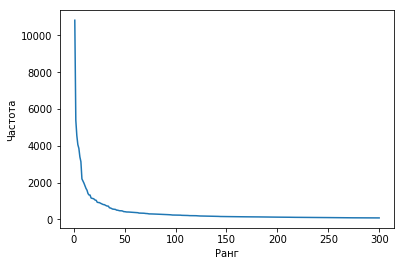

In [15]:
plt.plot(quantities_series)
plt.xlabel('Ранг')
plt.ylabel('Частота')
plt.show()